# Modulo 5: Ejercicio 4
## Alumno: Jose Suarez

### Ejercicio 1
Para estimar la proporción de habitantes de una ciudad que poseen ordenador personal se toma una muestra de tamaño n. Calcula el valor mínimo de n para garantizar, con un nivel de confianza del 95 %, que el error de estimación no supera el 2 %. (Como se desconoce la proporción, se hará a partir del caso más desfavorable, que será 0,5).

In [32]:
import numpy as np
import pandas as pd
from scipy.stats import norm, binom,geom,t,chi2 

alpha = 0.05
alphamedio = alpha / 2
error = 0.02
probOrdenador = 0.5

z_Alpha = -norm.ppf(alphamedio)
tamañoMuestra = np.round((z_Alpha ** 2 * 0.5**2 / (error**2)), 4)

print("1) El tamaño mínimo de la muestra necesario es de", tamañoMuestra)


1) El tamaño mínimo de la muestra necesario es de 2400.9118


### Ejercicio 2
Un fabricante de electrodomésticos sabe que la vida media de estos sigue una distribución normal con media 100 meses y desviación típica 12 meses. Determina el mínimo tamaño muestral que garantiza, con una probabilidad de 0,98, que la vida media de los electrodomésticos en dicha muestra se encuentre entre 90 y 100 meses.

In [57]:
mu_Electro = 100  
sigma_Electro = 12 

nivelConfianza = 0.98
alpha_electro = (1-nivelConfianza)
zalphamedio = -norm.ppf(alpha_electro/2)

tamañoMuestra = np.round((zalphamedio*sigma_Electro/5)**2,2)

print("2)El tamaño mínimo de la muestra necesario es de minimo", tamañoMuestra)

2)El tamaño mínimo de la muestra necesario es de minimo 31.17


### Ejercicio 3
Se desea obtener la media de una variable aleatoria que se distribuye normalmente con una desviación típica de 3,2. Para ello se toma una muestra de 64 individuos obteniéndose una media de 32,5.
#### 3.a) ¿Con qué nivel de confianza se puede afirmar que la media de la población está entre 31,5 y 33,5?

In [54]:
tamañoMuestra = 64
sigma = 3.2

amplitud = 33.5 - 31.5
error = amplitud/2

zalphamedio = error * (tamañoMuestra ** 0.5) / sigma
probZalphamedio = norm.cdf(zalphamedio)

alpha = (1-probZalphamedio)*2

nivelConfianza = np.round(1 - alpha, 4)*100

print(f"3.a) El nivel de confianza con el que se puede afirmar que la media poblacional esta entre 31.5 y 33.5 es de un {nivelConfianza}%")

3.a) El nivel de confianza con el que se puede afirmar que la media poblacional esta entre 31.5 y 33.5 es de un 98.76%


#### 3.b) Si la desviación típica de la población fuera 3, ¿qué tamaño mínimo debería tener la muestra con la cual estimamos la media poblacional si queremos que el nivel de confianza sea del 99 %, y el error admisible no supere el valor de 0,75?

In [65]:
sigma = 3

nivelConfianza = 0.99
alpha = (1-nivelConfianza)
zalphamedio = -norm.ppf(alpha/2)

tamañoMuestra = np.round((zalphamedio*sigma/.75)**2,2)
print("3.b)El tamaño mínimo de la muestra necesario es de minimo", tamañoMuestra)

3.b)El tamaño mínimo de la muestra necesario es de minimo 106.16


### Ejercicio 4:
La duración de un cierto tipo de cuenta de crédito en un banco se describe por una distribución Normal con desviación típica 1500 horas.
#### 4.a) Si en una muestra de clientes de tamaño 100, tomada al azar, se ha observado que la duración media es de 9900 horas, determine un intervalo, con el 95 % de confianza, para la duración media de esta clase de cuentas de crédito.

In [15]:
sigma_Poblacional = 1500

tamañoMuestra = 100
mu_Muestra = 9900
sigma_Error = sigma_Poblacional/ (tamañoMuestra ** 0.5)

alpha = 0.05
alphaMedio = alpha / 2

z_alphaMedio = -norm.ppf(alphamedio)

cotaInferior = np.round((mu_Muestra - (z_alphaMedio * sigma_Error)), 2)
cotaSuperior = np.round((mu_Muestra + (z_alphaMedio * sigma_Error)), 2)

print(f"4.a) El intervalo para la duracion poblacional del credito con un nivel de confianza del 95% esta entre {cotaInferior} horas y {cotaSuperior} horas")

4.a) El intervalo para la duracion poblacional del credito con un nivel de confianza del 95% esta entre 9606.01 horas y 10193.99 horas


### 4.b) Con un nivel de confianza del 99 % se ha construido un intervalo para la media con un error máximo de 772.5 horas, ¿Cuál es el tamaño de la muestra que se ha tomado en este caso?

In [75]:
ErrorMaximo = 772.5

alpha = 0.001
alphaMedio = alpha / 2

z_alphaMedio = -norm.ppf(alphaMedio)

tamañoMuestra = (z_alphaMedio * sigma_Poblacional / ErrorMaximo) ** 2
tamañoMuestra = np.ceil(tamañoMuestra)

print(f"4.b) Para el nivel de confianza y el error se deberia obtener una muestra de {tamañoMuestra} cuentas")

4.b) Para el nivel de confianza y el error se deberia obtener una muestra de 41.0 cuentas


### Ejercicio 5:
El precio de un determinado producto, en los comercios de alimentación de una ciudad, sigue una distribución normal. Se toma una muestra aleatoria de 8 comercios y se observa el precio de ese producto, obteniendo las siguientes observaciones:
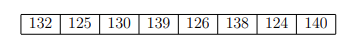

#### 5.a) Determine un intervalo de confianza del 95 % para la varianza poblacional.

In [68]:
muestraLista = [132,125,130,139,126,138,124,140]
muestraDF = pd.DataFrame({"Precio":muestraLista})

mu_Muestra = muestraDF.mean()
sigma_Muestra = muestraDF.std()
tamañoMuestra = muestraDF.count()
gradosLibertad = tamañoMuestra-1

alpha = 0.05
alphaMedio = alpha / 2

mu_CotaInferior = chi2.isf(alphaMedio, gradosLibertad)[0]
mu_CotaSuperior = chi2.isf(1-alphaMedio, gradosLibertad)[0]

cotaInferior = np.round((gradosLibertad * (sigma_Muestra**2) / mu_CotaInferior)**0.5, 2)[0]
cotaSuperior = np.round((gradosLibertad * (sigma_Muestra**2) / mu_CotaSuperior)**0.5, 2)[0]


print(f"5.a) El intervalo para la varianza poblacional del precio con un nivel de confianza del 95% esta entre {cotaInferior} y {cotaSuperior}")

5.a) El intervalo para la varianza poblacional del precio con un nivel de confianza del 95% esta entre 4.34 y 13.36


#### 5.b) Determine un intervalo de confianza del 95 % para la proporción de productos con precios menores o iguales a 130

In [74]:
muestraLista = [132,125,130,139,126,138,124,140]
muestraDF = pd.DataFrame({"Precio":muestraLista})
muestraDF = muestraDF[muestraDF["Precio"] <= 130]

mu_Muestra = muestraDF.mean()
sigma_Muestra = muestraDF.std()
tamañoMuestra = muestraDF.count()
gradosLibertad = tamañoMuestra-1

alpha = 0.05
alphaMedio = alpha / 2

mu_CotaInferior = chi2.isf(alphaMedio, gradosLibertad)[0]
mu_CotaSuperior = chi2.isf(1-alphaMedio, gradosLibertad)[0]

cotaInferior = np.round((gradosLibertad * (sigma_Muestra**2) / mu_CotaInferior)**0.5, 2)[0]
cotaSuperior = np.round((gradosLibertad * (sigma_Muestra**2) / mu_CotaSuperior)**0.5, 2)[0]


print(f"5.b) El intervalo para la varianza poblacional del precio con un nivel de confianza del 95% y valores menores o iguales a 130 esta entre {cotaInferior} y {cotaSuperior}")

5.b) El intervalo para la varianza poblacional del precio con un nivel de confianza del 95% y valores menores o iguales a 130 esta entre 1.49 y 9.81


### Ejercicio 6:
Se desea estudiar si es que hay diferencias en las probabilidades de ocurrencia de accidentes automovilísticos dependiendo del color de los autos. A 100 propietarios de vehículos de color rojo y a 200 de color blanco, se les consultó si habían tenido algún accidente durante el tiempo que han sido dueños de los autos. Se obtuvo como resultado que 45 de los dueños de autos rojos y 70 de los autos blancos habían tenido al menos un accidente automovilístico. Construya un intervalo de confianza de 90% para la diferencia de las probabilidades de que ocurra al menos un accidente automovilístico.

In [95]:
tamañoMuestra_Rojo = 100
tamañoMuestra_Blanco = 200

accidentados_Rojo = 45
accidentados_Blanco = 70
propMuestraAccidentes_Rojo = accidentados_Rojo / tamañoMuestra_Rojo
propMuestraAccidentes_Blanco = accidentados_Blanco / tamañoMuestra_Blanco
DifMuestralAccidentes = np.round(propMuestraAccidentes_Rojo - propMuestraAccidentes_Blanco, 5)

alpha = 0.1
alphaMedio = alpha / 2
z_alphaMedio = -norm.ppf(alphaMedio)

cotaInferior = (DifMuestralAccidentes - (z_alphaMedio * 
                ((propMuestraAccidentes_Rojo * (1 - propMuestraAccidentes_Rojo) / tamañoMuestra_Rojo) + 
                 (propMuestraAccidentes_Blanco * (1 - propMuestraAccidentes_Blanco) / tamañoMuestra_Blanco)) ** 0.5))
cotaInferior = np.round(cotaInferior*100,2)
cotaSuperior = (DifMuestralAccidentes + (z_alphaMedio * 
                ((propMuestraAccidentes_Rojo * (1 - propMuestraAccidentes_Rojo) / tamañoMuestra_Rojo) + 
                 (propMuestraAccidentes_Blanco * (1 - propMuestraAccidentes_Blanco) / tamañoMuestra_Blanco)) ** 0.5))
cotaSuperior = np.round(cotaSuperior*100,2)

print(f"6) El intervalo para la diferencia de probabilidades de accidentes de vehiculos con un nivel de confianza del 90% esta entre {cotaInferior}% y {cotaSuperior}%")

6) El intervalo para la diferencia de probabilidades de accidentes de vehiculos con un nivel de confianza del 90% esta entre 0.11% y 19.89%
